<a href="https://colab.research.google.com/github/mrakinola/Neural-Networks-FYP/blob/main/ProjectCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aims and Objectives**
Using the TensorFlow framework, a library within the Python Programming language, both a Deep 
Neural Network or also known as a Multi-Layer Perceptron (MLP) and a CNN will be generated to 
classify coloured images for object recognition from the CIFAR-10 dataset into 10 distinct classes, 
consisting of 50,000 training images along with 10,000 images for testing and validation. CIFAR-10 is 
a well-recognised dataset that is extensively employed for benchmarking computer vision algorithms
in machine learning. The field is promising, and the results could help confirm which scenarios CNNs 
thrive in and how it can be used in engineering practices and applications, along with its shortfalls 
and where improvement is needed. The usage of a MLP is for comparison, to see how advanced the 
CNN architecture is to other Neural Networks in this task. The corresponding objectives of the 
project can be described as follows:
1. Code and construct a fully functioning Multi-Layer Perceptron (MLP). 


*   Train the MLP with the training data from the chosen dataset. Find ways to 
optimise the program to increase the accuracy in a given number of epochs.
*   Use the test dataset to test its accuracy to unseen data.
*   Plot graphs for the metrics specified of the neural network for both the 
training data and validation data for a visual representation.

2. Code and construct a Baseline Deep Convolutional Neural Network.
* Using the same dataset whilst controlling the number of epochs, train a 
Deep CNN.
* Use the same test dataset to test its accuracy.
* Plot graphs to discern visually the metrics.
3. Improve the accuracy of the Baseline CNN with more advanced techniques.
* Make changes to the architecture of the Baseline CNN to decrease the loss 
function and improve the accuracy whilst keeping the value for the number 
of parameters and epoch training the same.
4. Evaluate the results with a thorough statistical analysis.
* Tabulated results containing Loss functions, Accuracy amongst other 
metrics.
* More In-depth graphs detailing the metrics training at each epoch with 
direct comparisons between all models.
* 5-number summary of the models fitting the test datasets.
* Perform a Pairwise Mann-Whitney U test for hypothesis testing.
* Confusion Matrices and Classification Reports plotted for each model.

# **Importing the necessary libraries for usage in the project**

In [ ]:
# TensorFlow Library imported along with a helper library Matplotlib.

import tensorflow as tf

import sys
import os
from tensorflow.keras import datasets, layers, models, callbacks, utils
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
# Helper Library
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Preprocessing the data

The CIFAR dataset is comprised of 60,000 32×32-pixel photographs with an extra 3 RGB channel for 
the colour of objects making the input shape 32x32x3. The objects from the images are divided into
10 classes, such as frogs, birds, cats, ships, etc. These are very small images as the dataset was 
intended for computer vision research. 

The images are all pre-segmented, where each image 
comprises of only a singular object. The dataset was then imported and through using another 
Python Library, known as MatPlotLib, the first 25 images of the training dataset were plotted, 
signifying the typical images that the program was trained in, along with its classes.


The 10 categorical class labels were then transformed into a 10-element binary vector, with the 
value of 1 being issued for the index of the class value. This process is known as One Hot Encoding 
and is required in the pre-processing as the architectures works more efficiently with numerical 
inputs, also that machine learning algorithms cannot work with categorical data directly.


The colour range for each image within the dataset lies within 0 to 255 in which they are integers. 
Image models perform better when the pixels are normalized, so the data types were converted
from an unsigned integer to a float. Both the training and test image pixel values were then divided
by 255 to rescale them.
A batch size, the number of samples propagated through the network, is set at value 256. This is so 
that less memory is required whilst the network trains faster with the mini batches. This is 
advantageous as the weights and parameters will be updated much more frequently.


The dataset, when loaded through TensorFlow, was split into 50,000 training images and 10,000 test 
images. The training set was then split again into the ration 80:20 for the training-validation dataset, 
resulting in 40,000 images for training and 10,000 for the validation. The extra split for a separate 
validation dataset was needed to provide an unbiased evaluation of a model fit on the training 
dataset with the opportunity to tune the hyperparameters.

Although it initially starts unbiased, it 
becomes more biased as information from the validation data begins to leak into the training 
process as hyper-parameters are chosen based off the validation results, which may not generalise 
well if the validation was solely used as for testing. However, if leakage were to occur, it would not 
affect the testing dataset as this is not used until evaluation, hence enabling the model to be tested
unbiasedly.



In [ ]:
# Load Test data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [ ]:
	# Normalize pixel values to be between 0 and 1
  # convert from integers to floats
	train_images = train_images.astype('float32')
	test_images = test_images.astype('float32')
	# normalize to range 0-1
	train_images = train_images / 255.0
	test_images = test_images / 255.0

In [ ]:
 train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

In [ ]:
print(validation_images.shape)

(10000, 32, 32, 3)


In [ ]:
print("\n**********************************************************")
print("***Running CIFAR Convolutional Neural Network program!***") # Print line signifying what NN and dataset is being compiled
print("**********************************************************\n")


**********************************************************
***Running CIFAR Convolutional Neural Network program!***
**********************************************************



In [ ]:
# Using MatPlot Library, the dataset is verified initially
# First 30 images are plotted from training set with the class names found below
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

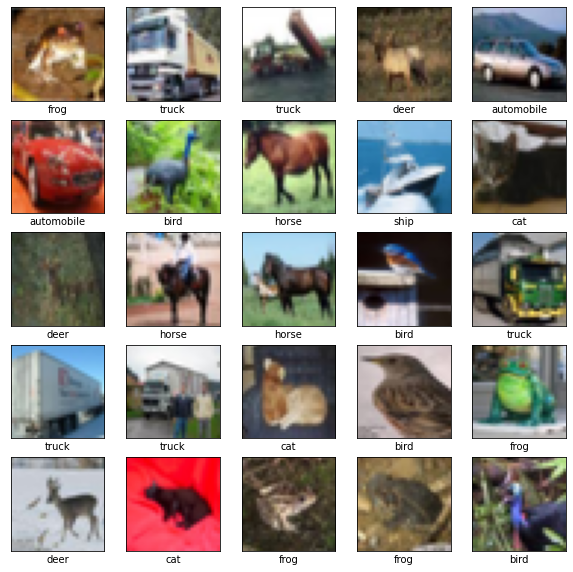

In [ ]:
# Visualizing the data through MatPlotLib
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.savefig('visualize.png')
plt.show()


# **Control Factors**
The main control factor throughout all the models is the total number of parameters, or weights 
within all models. A neural network with many million more weights will most likely outperform a 
similar model with reduced weights. Limiting the models to have trainable parameters not exceeding 
a set value will help display how other variables and hyperparameters affect the model, without 
making the models more computationally intensive. The value set for the project was to not exceed 
1,700,000 total parameters for any of the models. This was chosen as this allowed for feasible 
running, compiling and epoch times on a standard PC. The value is high enough that underfitting, 
models lacking the sufficient processing capacity to fit both the training dataset and new data well, should not occur. 


For the models to be compiled, an optimizer, a loss function along with a metric to measure was
needed. This was kept as a control for all models. The Adam (Adaptive Moment Estimation)
optimization algorithm is an extension to the commonly used Stochastic Gradient Descent in deep 
learning. It has been recommended as the default optimization method to use for deep learning 
applications by many. Its selection was due it being computationally efficient, well suited for 
challenges requiring large data and parameters, and its invariance to gradient diagonal rescaling. The optimizer’s configuration parameters, such as the learning rate, were selected off the 
default values from the Adam paper. For the loss, Categorical Cross-Entropy was selected. Here, a 
SoftMax activation is incorporated with a Cross-Entropy Loss. With this, the models will output a 
probability over the classes for each image. Furthermore, the metric selected is the classification 
accuracy, where a calculation is performed for how often the model’s predictions equals the class 
labels. Along with the Test Accuracy and Cross-Entropy Loss, the Root Mean Squared Error (RMSE)
was used as another metric. It presents information on the short-term efficiency which is a 
benchmark of the difference of predicated values about the observed values. The lower the RMSE, 
the more accurate is the evaluation. These performance metrics are a good measures of the overall 
predictive accuracy. Finally, the epoch value for every model was also kept the same at 100.

# **Different models with their various layers, losses and metrics**

# Multi-Layer Peceptron

In [ ]:
        # Model for Multi-Layer Perceptron
        mlp = models.Sequential()
        mlp.add(layers.Flatten(input_shape=(32,32,3)))
        mlp.add(layers.Dense(512, activation='relu'))
        mlp.add(layers.Dense(128, activation='relu'))
        mlp.add(layers.Dense(128,activation='relu'))
        mlp.add(layers.Dense(10, activation='softmax'))
        
        #Compile mlp
        mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
        mlp.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 1,656,842
Trainable params: 1,656,842
Non-trainable params: 0
_________________________________________________________________


# Baseline CNN

In [ ]:
# Baseline CNN Model
# Convolutional base is created using a stack of Conv2D and MaxPooling2D layers.
# Tensors are of shape (image_height, image_width, color_channels) with channels being RGB
# The format for the CIFAR shape is chosen
baselineCNN = models.Sequential()
baselineCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32, 32, 3))) # First Convolution layer generating 32 filters,filters are 3x3, image size are 32x32 and x3 is used for the colour channels
baselineCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
baselineCNN.add(layers.MaxPooling2D((2, 2))) # 2x2 pool, so every 4 pixels, the largest will remain
baselineCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Another convolutional layer on top of another pooling layer is added.
baselineCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
baselineCNN.add(layers.MaxPooling2D((2, 2)))  # Layers has been quatered 2 times.
baselineCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
baselineCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
baselineCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
baselineCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# Final output tensor from base needs to be fed into one or more Dense layers to perform classification.
# Dense layers take inputs as 1D so the current 3D shape from the convolution needs to be flattened before adding dense layer.
# CIFAR has 10 output classes so final dense layer of 10 is used.
baselineCNN.add(layers.Flatten())
baselineCNN.add(layers.Dense(128, activation='relu'))
baselineCNN.add(layers.Dense(10, activation='softmax'))

# Model is compiled below
baselineCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
baselineCNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 128)        

# CNN with Dropout layers


In [ ]:
# Improved CNN model with Dropout added to the model.
# For the sake of ease, we will label the model as 'dropout_model'
# Convolutional base is created using a stack of Conv2D and MaxPooling2D layers.
# Tensors are of shape (image_height, image_width, color_channels) with channels being RGB
# The format for the CIFAR shape is chosen
# define cnn model
dropout_model = models.Sequential()
dropout_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
dropout_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
dropout_model.add(MaxPooling2D((2, 2)))
dropout_model.add(Dropout(0.25))
dropout_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
dropout_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
dropout_model.add(MaxPooling2D((2, 2)))
dropout_model.add(Dropout(0.3))
dropout_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
dropout_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
dropout_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
dropout_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
dropout_model.add(Dropout(0.35))
dropout_model.add(Flatten())
dropout_model.add(Dense(128, activation='relu'))
dropout_model.add(Dropout(0.4))
dropout_model.add(Dense(10, activation='softmax'))
	# compile model

# Model is compiled below
dropout_model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
dropout_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)         

# CNN with Weight Decay

In [ ]:
# Weight Decay (L2 Regularization)
# Weight decay involves updating the loss function to penalize the model in proportion to the size of the model weights.
# We can add weight regularization to the convolutional layers and 
# the fully connected layers by defining the “kernel_regularizer” argument and specifying the type of regularization.
# For simplification we will call this the L2 model
l2_model = models.Sequential()

l2_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
l2_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(MaxPooling2D((2, 2)))
l2_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(MaxPooling2D((2, 2)))
l2_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
l2_model.add(Flatten())
l2_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
l2_model.add(Dense(10, activation='softmax'))
	# compile model

# Model is compiled below
l2_model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
l2_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 8, 8, 128)       

# CNN with Batch Normalization

In [ ]:
# Batch CNN Model
# Convolutional base is created using a stack of Conv2D and MaxPooling2D layers.
# Tensors are of shape (image_height, image_width, color_channels) with channels being RGB
# The format for the CIFAR shape is chosen
batchCNN = models.Sequential()
batchCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32, 32, 3))) # First Convolution layer generating 32 filters,filters are 3x3, image size are 32x32 and x3 is used for the colour channels
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.MaxPooling2D((2, 2))) # 2x2 pool, so every 4 pixels, the largest will remain
batchCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Another convolutional layer on top of another pooling layer is added.
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.MaxPooling2D((2, 2)))  # Layers has been quatered 2 times.
batchCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# Final output tensor from base needs to be fed into one or more Dense layers to perform classification.
# Dense layers take inputs as 1D so the current 3D shape from the convolution needs to be flattened before adding dense layer.
# CIFAR has 10 output classes so final dense layer of 10 is used.
batchCNN.add(layers.Flatten())
batchCNN.add(layers.Dense(128, activation='relu'))
batchCNN.add(BatchNormalization())
batchCNN.add(layers.Dense(10, activation='softmax'))

# Model is compiled below
batchCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
batchCNN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 16, 16, 64)      

# CNN with Data Augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.15, height_shift_range=0.15, zoom_range=0.15, horizontal_flip=True)

In [ ]:
train_aug = datagen.flow(train_images, train_labels, batch_size=256)

In [ ]:
steps = int(train_images.shape[0] / 256)

In [ ]:
# Data Aug CNN Model
# Convolutional base is created using a stack of Conv2D and MaxPooling2D layers.
# Tensors are of shape (image_height, image_width, color_channels) with channels being RGB
# The format for the CIFAR shape is chosen
dataAugCNN = models.Sequential()
dataAugCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32, 32, 3))) # First Convolution layer generating 32 filters,filters are 3x3, image size are 32x32 and x3 is used for the colour channels
dataAugCNN.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
dataAugCNN.add(layers.MaxPooling2D((2, 2))) # 2x2 pool, so every 4 pixels, the largest will remain
dataAugCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Another convolutional layer on top of another pooling layer is added.
dataAugCNN.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
dataAugCNN.add(layers.MaxPooling2D((2, 2)))  # Layers has been quatered 2 times.
dataAugCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
dataAugCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
dataAugCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
dataAugCNN.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# Final output tensor from base needs to be fed into one or more Dense layers to perform classification.
# Dense layers take inputs as 1D so the current 3D shape from the convolution needs to be flattened before adding dense layer.
# CIFAR has 10 output classes so final dense layer of 10 is used.
dataAugCNN.add(layers.Flatten())
dataAugCNN.add(layers.Dense(128, activation='relu'))
dataAugCNN.add(layers.Dense(10, activation='softmax'))

# Model is compiled below
dataAugCNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
dataAugCNN.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 8, 8, 128)       

# CNN with regularization

In [ ]:
# Regularized CNN Model
# Convolutional base is created using a stack of Conv2D and MaxPooling2D layers.
# Tensors are of shape (image_height, image_width, color_channels) with channels being RGB
# The format for the CIFAR shape is chosen
regularized = models.Sequential()
regularized.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32, 32, 3))) # First Convolution layer generating 32 filters,filters are 3x3, image size are 32x32 and x3 is used for the colour channels
regularized.add(BatchNormalization())
regularized.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
regularized.add(BatchNormalization())
regularized.add(layers.MaxPooling2D((2, 2))) # 2x2 pool, so every 4 pixels, the largest will remain
regularized.add(Dropout(0.25))
regularized.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Another convolutional layer on top of another pooling layer is added.
regularized.add(BatchNormalization())
regularized.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
regularized.add(BatchNormalization())
regularized.add(layers.MaxPooling2D((2, 2)))  # Layers has been quatered 2 times.
regularized.add(Dropout(0.30))
regularized.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
regularized.add(BatchNormalization())
regularized.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
regularized.add(BatchNormalization())
regularized.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
regularized.add(BatchNormalization())
regularized.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
regularized.add(Dropout(0.35))
# Final output tensor from base needs to be fed into one or more Dense layers to perform classification.
# Dense layers take inputs as 1D so the current 3D shape from the convolution needs to be flattened before adding dense layer.
# CIFAR has 10 output classes so final dense layer of 10 is used.
regularized.add(layers.Flatten())
regularized.add(layers.Dense(128, activation='relu'))
regularized.add(BatchNormalization())
regularized.add(Dropout(0.4))
regularized.add(layers.Dense(10, activation='softmax'))

# Model is compiled below
regularized.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])
regularized.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 16, 16, 64)      

The model will be optimized using stochastic gradient descent.

We will use a modest learning rate of 0.001 and a large momentum of 0.9, both of which are good general starting points. The model will optimize the categorical cross entropy loss function required for multi-class classification and will monitor classification accuracy.

# Callbacks for each model, allowing their results to be logged in a csv file

In [ ]:
# Callback for saving history for Baseline CNN
filename='baseline_cnn_log.csv'
cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for MLP
filename='mlp_log.csv'
mlp_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for Dropout CNN
filename='dropout_cnn_log.csv'
dropout_cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for L2 CNN
filename='l2_cnn_log.csv'
l2_cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for Data Aug CNN
filename='data_aug_cnn_log.csv'
data_aug_cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for Batch Normalization
filename='batch_cnn_log.csv'
batch_cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
# Callback for saving history for L2/Dropout/Data Aug CNN/Batch Normalization
filename='regularized_cnn_log.csv'
regularized_cnn_history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Training Models

In [ ]:
# Training Baseline CNN
history = baselineCNN.fit(train_images, 
                          train_labels,
                          epochs=100, 
                          batch_size = 256,
                          callbacks=[cnn_history_logger], 
                          validation_data=(validation_images, validation_labels),
                          verbose=2)

Epoch 1/100
157/157 - 5s - loss: 1.8519 - accuracy: 0.3094 - root_mean_squared_error: 0.2807 - val_loss: 1.4610 - val_accuracy: 0.4627 - val_root_mean_squared_error: 0.2583
Epoch 2/100
157/157 - 4s - loss: 1.3318 - accuracy: 0.5165 - root_mean_squared_error: 0.2478 - val_loss: 1.2425 - val_accuracy: 0.5492 - val_root_mean_squared_error: 0.2405
Epoch 3/100
157/157 - 4s - loss: 1.0838 - accuracy: 0.6112 - root_mean_squared_error: 0.2257 - val_loss: 1.0510 - val_accuracy: 0.6258 - val_root_mean_squared_error: 0.2220
Epoch 4/100
157/157 - 4s - loss: 0.9414 - accuracy: 0.6646 - root_mean_squared_error: 0.2111 - val_loss: 1.0025 - val_accuracy: 0.6471 - val_root_mean_squared_error: 0.2161
Epoch 5/100
157/157 - 4s - loss: 0.8163 - accuracy: 0.7129 - root_mean_squared_error: 0.1977 - val_loss: 0.8928 - val_accuracy: 0.6870 - val_root_mean_squared_error: 0.2049
Epoch 6/100
157/157 - 4s - loss: 0.7158 - accuracy: 0.7458 - root_mean_squared_error: 0.1861 - val_loss: 0.8016 - val_accuracy: 0.7185 

In [ ]:
# Training MLP
history = mlp.fit(train_images, 
                  train_labels,
                  epochs=100, 
                  batch_size = 256,
                  callbacks=[mlp_history_logger], 
                  validation_data=(validation_images, validation_labels),
                  verbose=2)

Epoch 1/100
157/157 - 1s - loss: 1.9674 - accuracy: 0.2869 - root_mean_squared_error: 0.2860 - val_loss: 1.8188 - val_accuracy: 0.3424 - val_root_mean_squared_error: 0.2792
Epoch 2/100
157/157 - 1s - loss: 1.7530 - accuracy: 0.3732 - root_mean_squared_error: 0.2749 - val_loss: 1.7383 - val_accuracy: 0.3788 - val_root_mean_squared_error: 0.2740
Epoch 3/100
157/157 - 1s - loss: 1.6686 - accuracy: 0.4066 - root_mean_squared_error: 0.2697 - val_loss: 1.6642 - val_accuracy: 0.4025 - val_root_mean_squared_error: 0.2697
Epoch 4/100
157/157 - 1s - loss: 1.6139 - accuracy: 0.4238 - root_mean_squared_error: 0.2664 - val_loss: 1.7842 - val_accuracy: 0.3692 - val_root_mean_squared_error: 0.2761
Epoch 5/100
157/157 - 1s - loss: 1.5907 - accuracy: 0.4327 - root_mean_squared_error: 0.2649 - val_loss: 1.5716 - val_accuracy: 0.4432 - val_root_mean_squared_error: 0.2633
Epoch 6/100
157/157 - 1s - loss: 1.5269 - accuracy: 0.4571 - root_mean_squared_error: 0.2605 - val_loss: 1.5213 - val_accuracy: 0.4631 

In [ ]:
# Training Dropout/Regularization CNN
history = dropout_model.fit(train_images, 
                          train_labels,
                          epochs=100, 
                          batch_size = 256,
                          callbacks=[dropout_cnn_history_logger], 
                          validation_data=(validation_images, validation_labels),
                          verbose=2)

Epoch 1/100
157/157 - 5s - loss: 1.9918 - accuracy: 0.2541 - root_mean_squared_error: 0.2882 - val_loss: 1.6269 - val_accuracy: 0.3966 - val_root_mean_squared_error: 0.2699
Epoch 2/100
157/157 - 4s - loss: 1.5715 - accuracy: 0.4212 - root_mean_squared_error: 0.2659 - val_loss: 1.3533 - val_accuracy: 0.5121 - val_root_mean_squared_error: 0.2498
Epoch 3/100
157/157 - 4s - loss: 1.3592 - accuracy: 0.5078 - root_mean_squared_error: 0.2499 - val_loss: 1.1738 - val_accuracy: 0.5749 - val_root_mean_squared_error: 0.2348
Epoch 4/100
157/157 - 4s - loss: 1.2106 - accuracy: 0.5666 - root_mean_squared_error: 0.2370 - val_loss: 1.0321 - val_accuracy: 0.6323 - val_root_mean_squared_error: 0.2209
Epoch 5/100
157/157 - 4s - loss: 1.0932 - accuracy: 0.6115 - root_mean_squared_error: 0.2258 - val_loss: 0.9661 - val_accuracy: 0.6560 - val_root_mean_squared_error: 0.2138
Epoch 6/100
157/157 - 4s - loss: 0.9917 - accuracy: 0.6510 - root_mean_squared_error: 0.2161 - val_loss: 0.9730 - val_accuracy: 0.6663 

In [ ]:
# Training Dropout/Regularization CNN
history = l2_model.fit(train_images, 
                          train_labels,
                          epochs=100, 
                          batch_size = 256,
                          callbacks=[l2_cnn_history_logger], 
                          validation_data=(validation_images, validation_labels),
                          verbose=2)

Epoch 1/100
157/157 - 5s - loss: 2.1401 - accuracy: 0.2591 - root_mean_squared_error: 0.2876 - val_loss: 1.8025 - val_accuracy: 0.3622 - val_root_mean_squared_error: 0.2758
Epoch 2/100
157/157 - 4s - loss: 1.6780 - accuracy: 0.4126 - root_mean_squared_error: 0.2671 - val_loss: 1.7823 - val_accuracy: 0.3941 - val_root_mean_squared_error: 0.2721
Epoch 3/100
157/157 - 4s - loss: 1.4796 - accuracy: 0.4985 - root_mean_squared_error: 0.2515 - val_loss: 1.4750 - val_accuracy: 0.5039 - val_root_mean_squared_error: 0.2503
Epoch 4/100
157/157 - 4s - loss: 1.3628 - accuracy: 0.5495 - root_mean_squared_error: 0.2402 - val_loss: 1.3321 - val_accuracy: 0.5652 - val_root_mean_squared_error: 0.2369
Epoch 5/100
157/157 - 4s - loss: 1.2683 - accuracy: 0.5919 - root_mean_squared_error: 0.2306 - val_loss: 1.2849 - val_accuracy: 0.5862 - val_root_mean_squared_error: 0.2320
Epoch 6/100
157/157 - 4s - loss: 1.2024 - accuracy: 0.6200 - root_mean_squared_error: 0.2237 - val_loss: 1.3030 - val_accuracy: 0.5882 

In [ ]:
# Training Dropout/Regularization CNN
history = batchCNN.fit(train_images, 
                               train_labels,
                               epochs=100, 
                               batch_size = 256,
                               callbacks=[batch_cnn_history_logger], 
                               validation_data=(validation_images, validation_labels),
                               verbose=2)

Epoch 1/100
157/157 - 6s - loss: 1.2771 - accuracy: 0.5466 - root_mean_squared_error: 0.2416 - val_loss: 2.9391 - val_accuracy: 0.1047 - val_root_mean_squared_error: 0.3134
Epoch 2/100
157/157 - 5s - loss: 0.8245 - accuracy: 0.7101 - root_mean_squared_error: 0.1988 - val_loss: 3.0506 - val_accuracy: 0.1875 - val_root_mean_squared_error: 0.3185
Epoch 3/100
157/157 - 5s - loss: 0.6220 - accuracy: 0.7836 - root_mean_squared_error: 0.1737 - val_loss: 1.3264 - val_accuracy: 0.5515 - val_root_mean_squared_error: 0.2434
Epoch 4/100
157/157 - 5s - loss: 0.4855 - accuracy: 0.8311 - root_mean_squared_error: 0.1549 - val_loss: 0.7686 - val_accuracy: 0.7432 - val_root_mean_squared_error: 0.1896
Epoch 5/100
157/157 - 5s - loss: 0.3690 - accuracy: 0.8720 - root_mean_squared_error: 0.1357 - val_loss: 0.7933 - val_accuracy: 0.7446 - val_root_mean_squared_error: 0.1912
Epoch 6/100
157/157 - 5s - loss: 0.2687 - accuracy: 0.9076 - root_mean_squared_error: 0.1167 - val_loss: 0.9907 - val_accuracy: 0.7030 

In [ ]:
# Training Data Aug CNN
history = dataAugCNN.fit(train_aug,
                         steps_per_epoch=steps,
                         epochs=100,
                         callbacks=[data_aug_cnn_history_logger], 
                         validation_data=(validation_images, validation_labels),
                         verbose=2)

Epoch 1/100
156/156 - 18s - loss: 1.9262 - accuracy: 0.2709 - root_mean_squared_error: 0.2859 - val_loss: 1.6663 - val_accuracy: 0.3858 - val_root_mean_squared_error: 0.2720
Epoch 2/100
156/156 - 17s - loss: 1.6032 - accuracy: 0.4078 - root_mean_squared_error: 0.2682 - val_loss: 1.3875 - val_accuracy: 0.4904 - val_root_mean_squared_error: 0.2530
Epoch 3/100
156/156 - 17s - loss: 1.4227 - accuracy: 0.4807 - root_mean_squared_error: 0.2549 - val_loss: 1.2956 - val_accuracy: 0.5278 - val_root_mean_squared_error: 0.2455
Epoch 4/100
156/156 - 17s - loss: 1.2958 - accuracy: 0.5258 - root_mean_squared_error: 0.2451 - val_loss: 1.1954 - val_accuracy: 0.5683 - val_root_mean_squared_error: 0.2368
Epoch 5/100
156/156 - 17s - loss: 1.1974 - accuracy: 0.5684 - root_mean_squared_error: 0.2361 - val_loss: 1.1483 - val_accuracy: 0.5906 - val_root_mean_squared_error: 0.2316
Epoch 6/100
156/156 - 17s - loss: 1.1195 - accuracy: 0.5962 - root_mean_squared_error: 0.2294 - val_loss: 0.9585 - val_accuracy: 0

In [ ]:
# Training Dropout/Regularization CNN
history = regularized.fit(train_aug,
                          steps_per_epoch=steps, 
                          epochs=100,
                          callbacks=[regularized_cnn_history_logger], 
                          validation_data=(validation_images, validation_labels),
                          verbose=2)

Epoch 1/100
156/156 - 18s - loss: 1.9071 - accuracy: 0.3446 - root_mean_squared_error: 0.2822 - val_loss: 3.7090 - val_accuracy: 0.1007 - val_root_mean_squared_error: 0.3499
Epoch 2/100
156/156 - 17s - loss: 1.4735 - accuracy: 0.4770 - root_mean_squared_error: 0.2573 - val_loss: 2.8497 - val_accuracy: 0.1984 - val_root_mean_squared_error: 0.3070
Epoch 3/100
156/156 - 17s - loss: 1.2967 - accuracy: 0.5355 - root_mean_squared_error: 0.2445 - val_loss: 1.4567 - val_accuracy: 0.4986 - val_root_mean_squared_error: 0.2535
Epoch 4/100
156/156 - 17s - loss: 1.1579 - accuracy: 0.5894 - root_mean_squared_error: 0.2325 - val_loss: 0.9832 - val_accuracy: 0.6537 - val_root_mean_squared_error: 0.2160
Epoch 5/100
156/156 - 17s - loss: 1.0785 - accuracy: 0.6176 - root_mean_squared_error: 0.2248 - val_loss: 0.9489 - val_accuracy: 0.6695 - val_root_mean_squared_error: 0.2138
Epoch 6/100
156/156 - 17s - loss: 0.9938 - accuracy: 0.6515 - root_mean_squared_error: 0.2167 - val_loss: 1.1089 - val_accuracy: 0

Temporary storage of the histories of the trained models

In [ ]:
mlp_history=history

In [ ]:
baseline_history=history

In [ ]:
dropout_history=history

In [ ]:
weight_history=history

In [ ]:
batch_history=history

In [ ]:
data_history=history

In [ ]:
reg_history=history

# Confusion Matrix of the trained models

In [ ]:
warnings.filterwarnings('ignore')
predicted = regularized.predict(test_images)
matrix = confusion_matrix(test_labels.argmax(axis=1), predicted.argmax(axis=1))
print(matrix)

[[847  39  25   1   5   0   6   5  49  23]
 [  2 978   0   0   0   0   1   0   1  18]
 [ 19  14 846  18  22  15  40  11   7   8]
 [ 11  16  44 707  25  79  59  18  21  20]
 [  7   3  29  27 860   6  41  20   4   3]
 [  4  12  25  70  24 800  20  32   6   7]
 [  2   8  12   6   9   1 956   1   3   2]
 [  3   8   9   9  19  11   6 926   2   7]
 [ 16  25   4   0   1   0   2   0 937  15]
 [  2  60   3   1   0   0   0   2   7 925]]


Confusion Matrix displayed

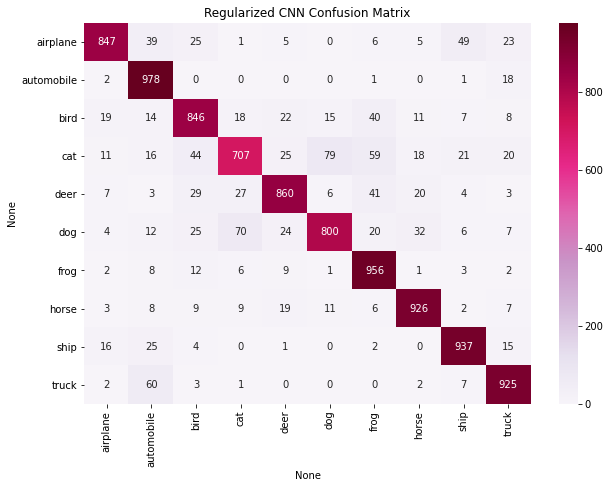

In [ ]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix, index = [['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']],
                  columns = [['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']])
plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Regularized CNN Confusion Matrix')

sn.heatmap(df_cm,cmap='PuRd', annot=True, fmt='.4g')
plt.savefig('CM.png')

# Classification Report displayed

In [ ]:
predicted = regularized.predict(test_images)
report = classification_report(test_labels.argmax(axis=1), predicted.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1000
           1       0.84      0.98      0.90      1000
           2       0.85      0.85      0.85      1000
           3       0.84      0.71      0.77      1000
           4       0.89      0.86      0.88      1000
           5       0.88      0.80      0.84      1000
           6       0.85      0.96      0.90      1000
           7       0.91      0.93      0.92      1000
           8       0.90      0.94      0.92      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



[0.93, 0.85, 0.89]
[0.84, 0.98, 0.9]
[0.85, 0.85, 0.85]
[0.84, 0.71, 0.77]
[0.89, 0.86, 0.88]
[0.88, 0.8, 0.84]
[0.85, 0.96, 0.9]
[0.91, 0.93, 0.92]
[0.9, 0.94, 0.92]
[0.9, 0.93, 0.91]
plotMat: [[0.93, 0.85, 0.89], [0.84, 0.98, 0.9], [0.85, 0.85, 0.85], [0.84, 0.71, 0.77], [0.89, 0.86, 0.88], [0.88, 0.8, 0.84], [0.85, 0.96, 0.9], [0.91, 0.93, 0.92], [0.9, 0.94, 0.92], [0.9, 0.93, 0.91]]
support: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


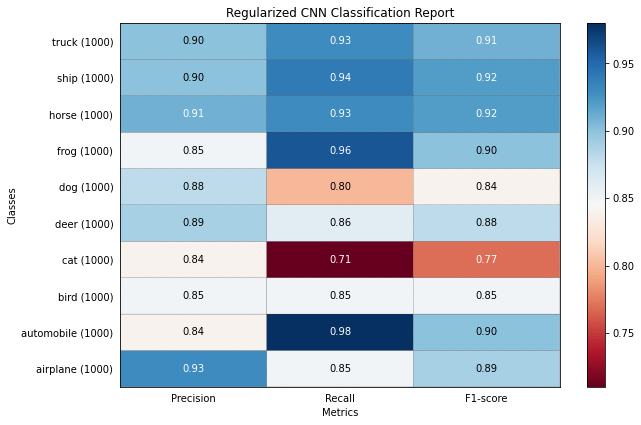

In [ ]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):


    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []

    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """              precision    recall  f1-score   support

           airplane       0.93      0.85      0.89      1000
           automobile       0.84      0.98      0.90      1000
           bird       0.85      0.85      0.85      1000
           cat       0.84      0.71      0.77      1000
           deer       0.89      0.86      0.88      1000
           dog       0.88      0.80      0.84      1000
           frog       0.85      0.96      0.90      1000
           horse       0.91      0.93      0.92      1000
           ship       0.90      0.94      0.92      1000
           truck       0.90      0.93      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
    """
    plot_classification_report(sampleClassificationReport)
    plt.title("Regularized CNN Classification Report")
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.show()
    plt.close()

if __name__ == "__main__":
    main()

# **Presentation of Results via MatPlotLib**

There are two key aspects to present: the diagnostics of the learning behavior of the model during training and the estimation of the model performance.

First, the diagnostics involve creating a line plot showing model performance on the train and test set during training. These plots are valuable for getting an idea of whether a model is overfitting, underfitting, or has a good fit for the dataset.

We will create a three subplots, one for the classification accuracy, one for the cross-entropy loss and finally the root-mean square error. The blue lines will indicate model performance on the training dataset and orange lines will indicate performance on the hold out validation dataset. All of the plots will be plotted against the number of epochs.

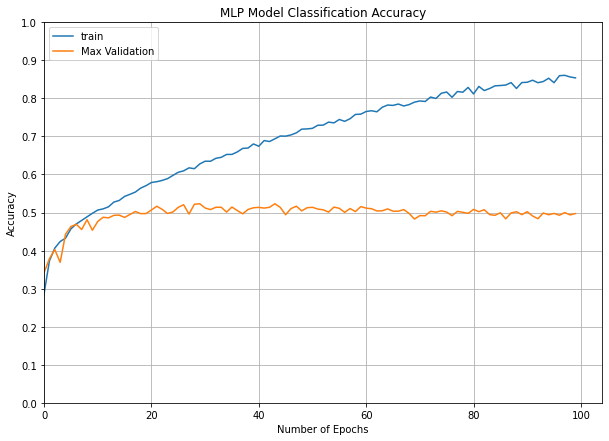

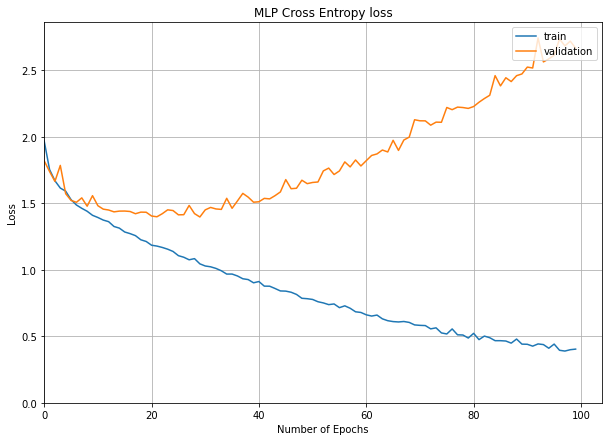

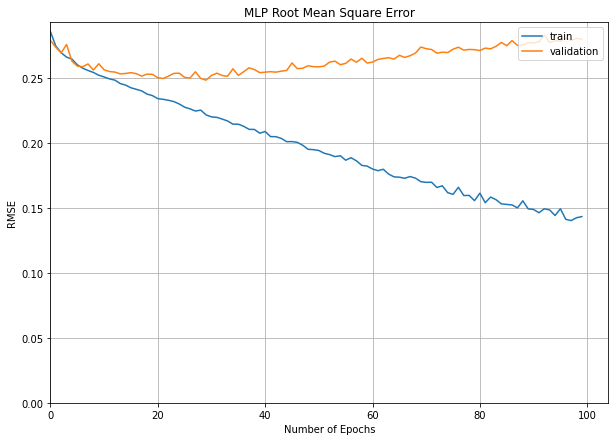

In [ ]:
# MLP Plot
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'Max Validation'], loc='upper left')
plt.grid()
plt.savefig('MLPAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('MLPLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('MLP Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('MLPCNNRMSE.png')
plt.show()


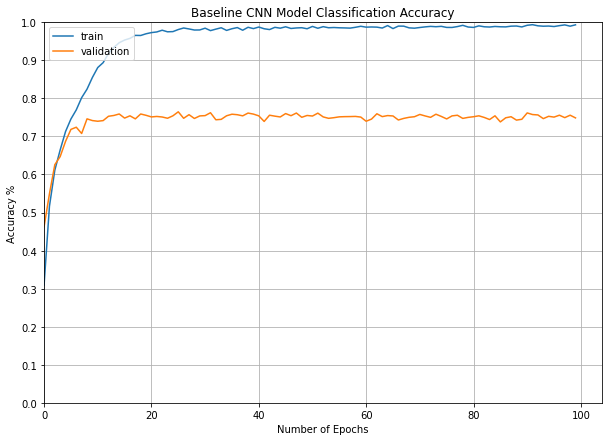

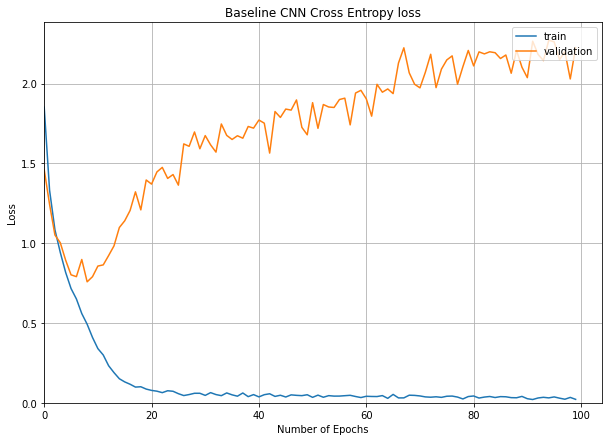

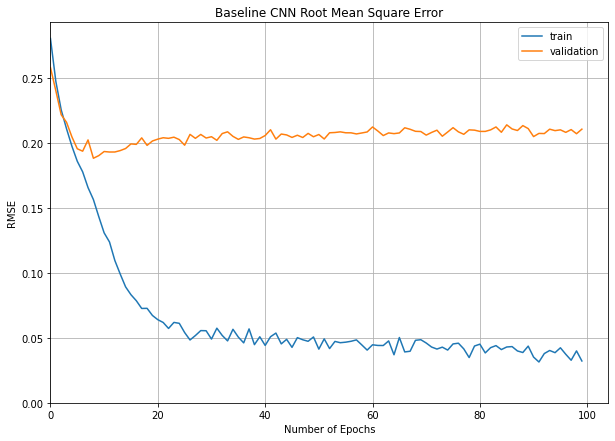

In [ ]:
# Baseline CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Baseline CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('BaseAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Baseline CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('BaseLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Baseline CNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('BaseCNNRMSE.png')
plt.show()


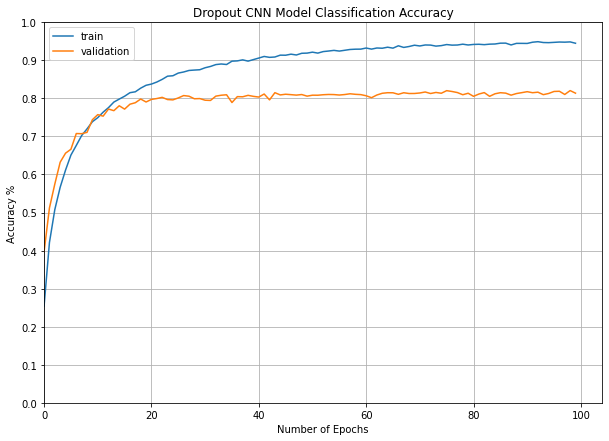

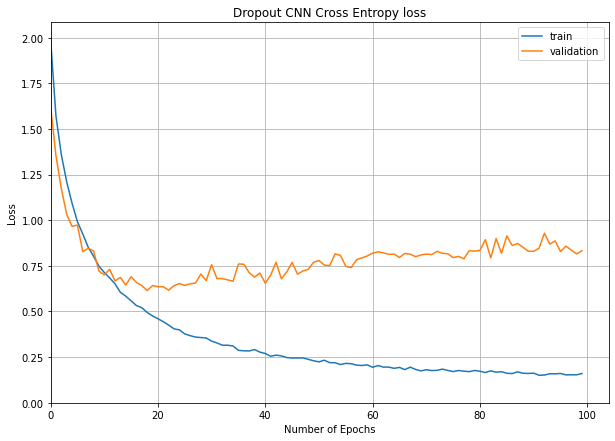

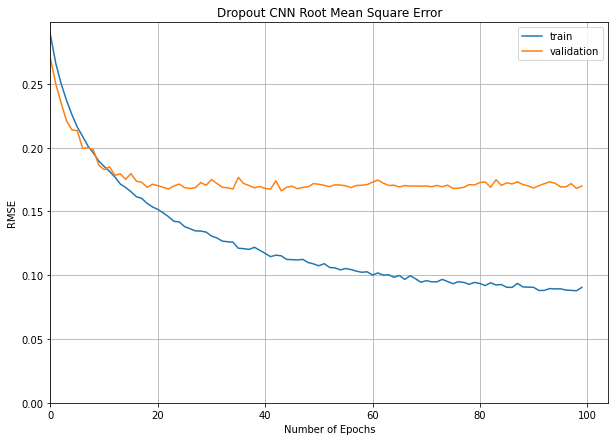

In [ ]:
# Dropout CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Dropout CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('DropAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Dropout CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('DropLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Dropout CNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('DropCNNRMSE.png')
plt.show()


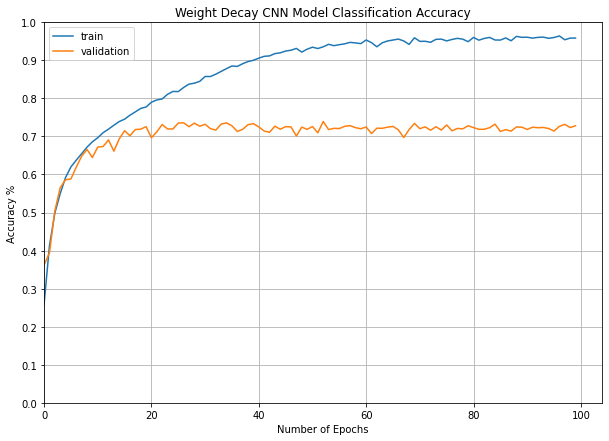

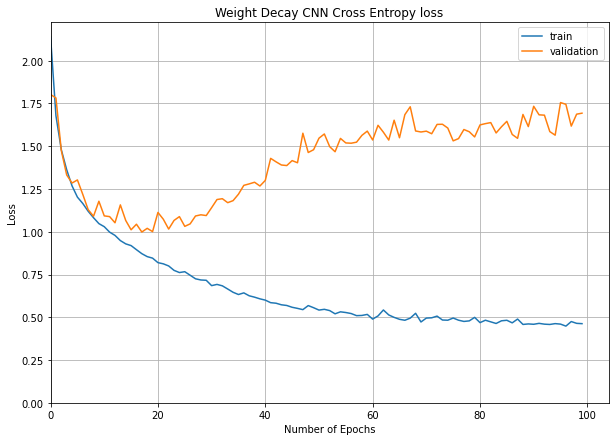

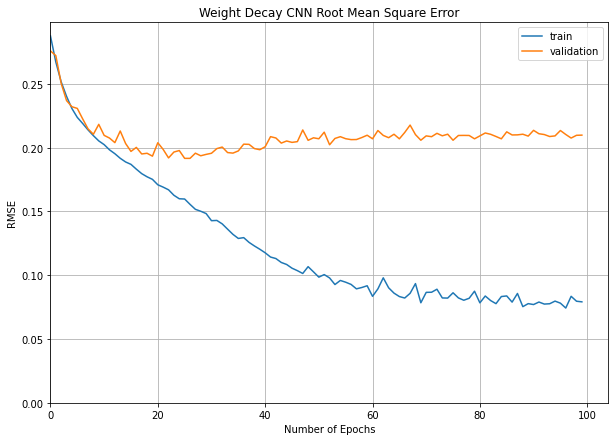

In [ ]:
# Weight Decay CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Weight Decay CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('WeightAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Weight Decay CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('WeightLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Weight Decay CNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('WeightCNNRMSE.png')
plt.show()



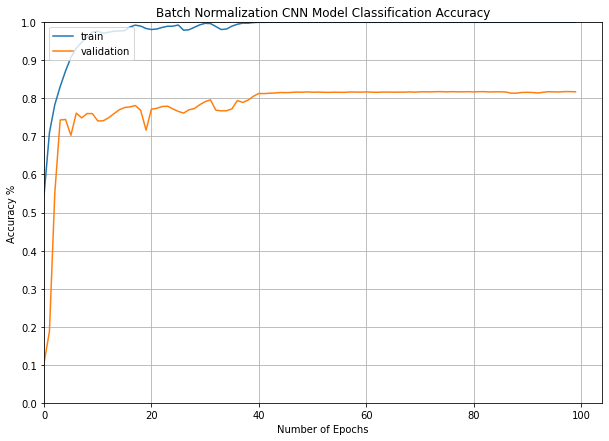

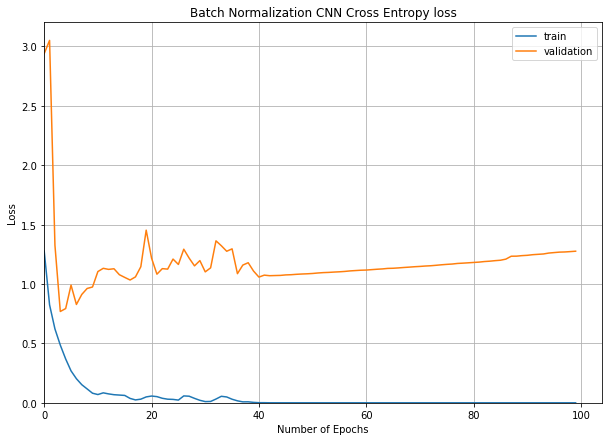

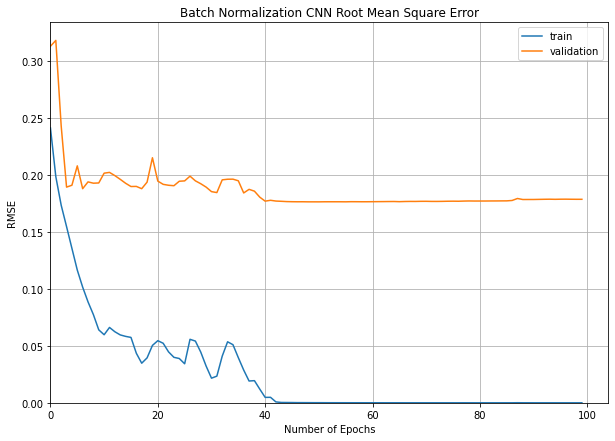

In [ ]:
# Batch Normalization CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Batch Normalization CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('BatchAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Batch Normalization CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('BatchLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Batch Normalization CNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('BatchCNNRMSE.png')
plt.show()


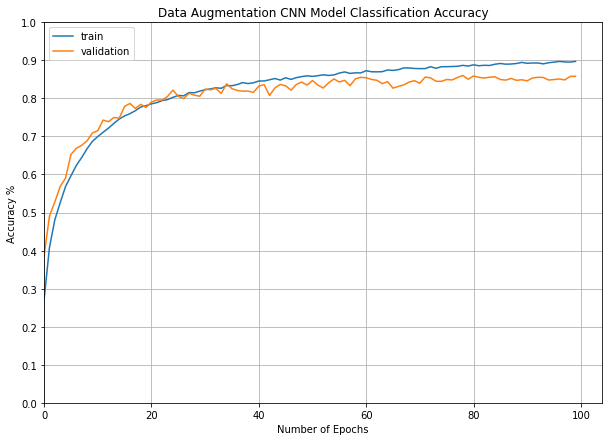

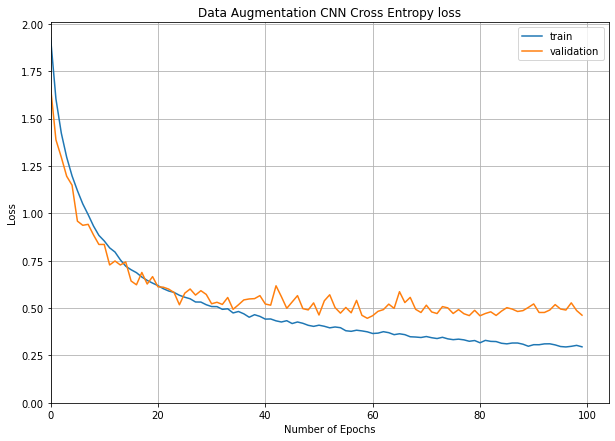

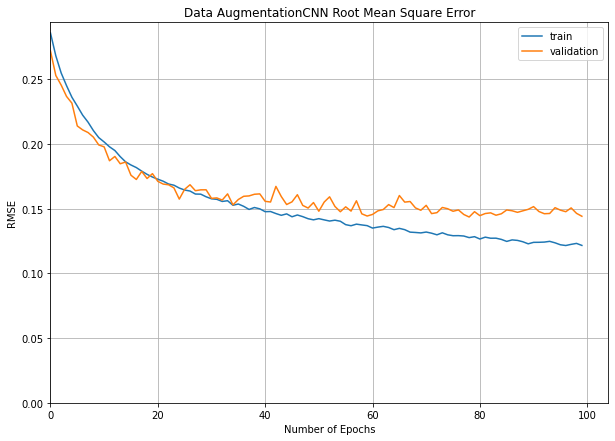

In [ ]:
# Data Augmentation CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Data Augmentation CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('DataAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Data Augmentation CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('DataLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Data AugmentationCNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('DataCNNRMSE.png')
plt.show()

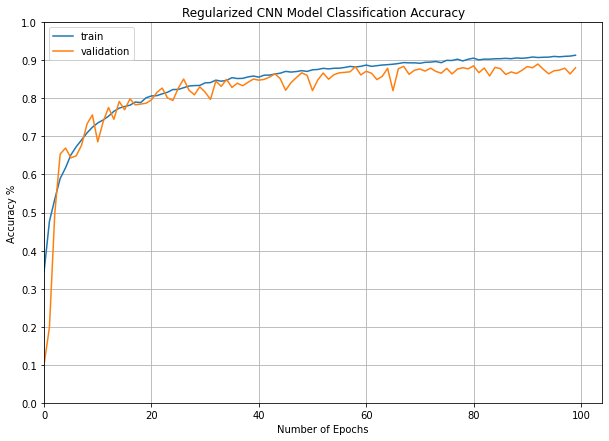

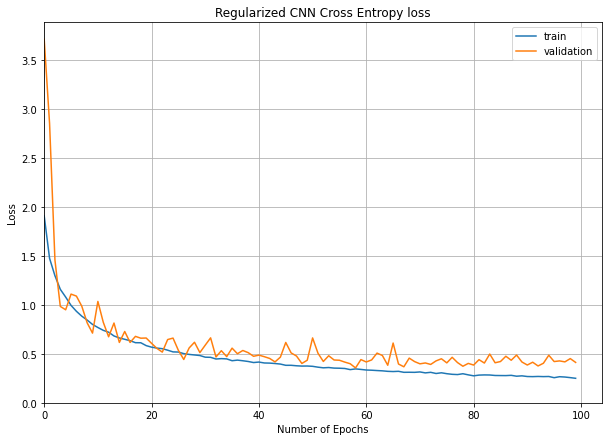

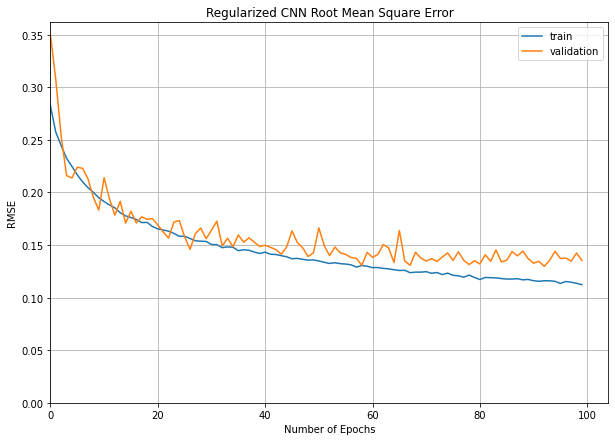

In [ ]:
# Regularized CNN
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Regularized CNN Model Classification Accuracy')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Accuracy %')
plt.ylim(bottom=0, top=1)
plt.xlim(left=0)
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('RegAccuracy.png')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Regularized CNN Cross Entropy loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('RegLoss.png')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Regularized CNN Root Mean Square Error')
plt.ylabel('RMSE')
plt.xlabel('Number of Epochs')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.savefig('RegCNNRMSE.png')
plt.show()

# Model Results based on test images

In [ ]:
# Final model performance on test results
test_loss, test_acc, test_rmse = mlp.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 2.6240 - accuracy: 0.4990 - root_mean_squared_error: 0.2787


In [ ]:
# Final model performance on test results
print('> %.3f' % (acc * 100.0))

> 79.770


Rough Mann-Whitney U test

In [ ]:
group1=[89.0,88.93,88.5,88.43,89.43]

In [ ]:
group2=[84.33,84.1,84.6,85.21,88.69,88.4]

In [ ]:

# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2.000, p=0.011
Different distribution (reject H0)
